In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Data observation

## Transactions data

In [2]:
transactions_data = pd.read_csv('transactions.csv')

In [3]:
transactions_data.tail()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
6849341,61870738,453 16:03:02,5499,1010,-5176.84,10217113
6849342,61870738,454 10:54:60,5411,1010,-1652.77,022915
6849343,61870738,454 14:23:59,5499,1010,-4687.23,10217113
6849344,61870738,454 16:11:53,5541,1110,-4491.83,RU570124
6849345,61870738,454 18:06:30,6011,7010,408756.67,372701


In [4]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6849346 entries, 0 to 6849345
Data columns (total 6 columns):
customer_id    int64
tr_datetime    object
mcc_code       int64
tr_type        int64
amount         float64
term_id        object
dtypes: float64(1), int64(3), object(2)
memory usage: 313.5+ MB


In [5]:
customers = np.unique(transactions_data['customer_id'])

## MCC_Codes data

In [6]:
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')

In [7]:
tr_mcc_codes.head()

,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [8]:
tr_mcc_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
mcc_code           184 non-null int64
mcc_description    184 non-null object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


## Transactions type data

In [9]:
tr_types = pd.read_csv('tr_types.csv', sep=';')

In [10]:
tr_types.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [11]:
tr_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
tr_type           155 non-null int64
tr_description    155 non-null object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


## Date transformation

In [12]:
transactions_data['day'] = list(map(lambda x: x.split()[0], transactions_data['tr_datetime']))

In [13]:
transactions_data.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2


## Info

In [14]:
print("There are %s customers." % len(customers))
print("There are %s transaction types." % len(tr_types))
print("There are %s MCC codes." % len(tr_mcc_codes))
print("The possible period of transactions observation is %s." % transactions_data['tr_datetime'][len(transactions_data) - 1])

There are 15000 customers.
There are 155 transaction types.
There are 184 MCC codes.
The possible period of transactions observation is 454 18:06:30.


## Clients datasets

In [15]:
def get_customers_dict(transactions_data):
    customers_data = {}
    customers_id = np.unique(transactions_data['customer_id'])
    for customer in customers_id:
        customers_data[customer] = transactions_data[transactions_data['customer_id'] == customer]
    return customers_id, customers_data

In [16]:
customers_id, customers_data = get_customers_dict(transactions_data)

Let's build a plot for every clients with dependency $amount(time)$ to look at outliers. 

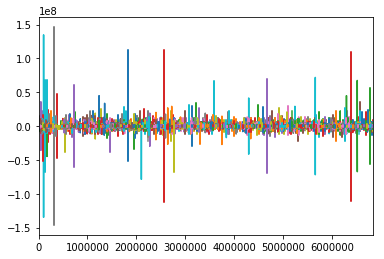

In [17]:
for customer in customers_id:
    customers_data[customer]['amount'].plot()

Let's check out transactions amount distribution

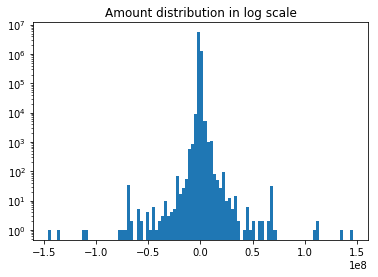

In [18]:
plt.hist(x = transactions_data['amount'], bins=100, log=True)
plt.title('Amount distribution in log scale')
plt.show()

Let's check out the disturbtion of transactions number

In [19]:
q = []
for customer in customers_id:
    q.append(len(customers_data[customer]))

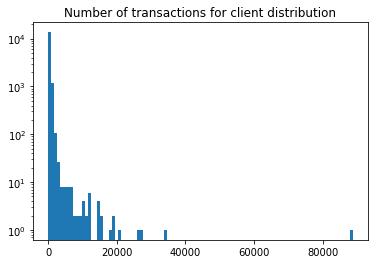

In [20]:
plt.hist(x=q, bins=100, log=True)
plt.title('Number of transactions for client distribution')
plt.show()

Let's build plot of $amount(time)$ dependency for random 10 clients.

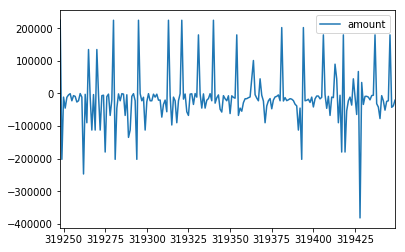

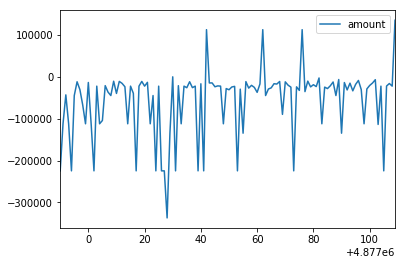

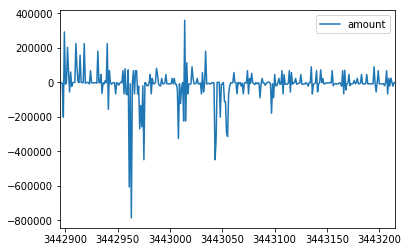

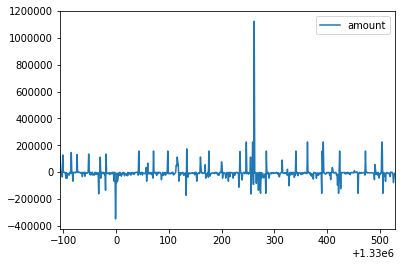

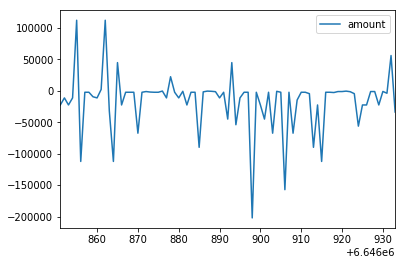

In [21]:
rand_customers = np.random.randint(low=0, high=len(customers_id - 1), size = 5)
for id in rand_customers:
    customers_data[customers_id[id]][['amount', 'tr_datetime']].plot()

## Filter by transactions amount

Let's get 5 customers with highest amount of transactions

In [22]:
transactions_length = list(zip(customers_id, map(lambda x: len(customers_data[x]), customers_id)))

In [23]:
transactions_length.sort(key=lambda x: x[1], reverse = True)

In [24]:
transactions_length[:5]

[(70780820, 88781),
 (45479973, 34229),
 (90796706, 26856),
 (6736634, 25944),
 (60151282, 21111)]

In [25]:
customers_data[transactions_length[:5][0][0]].to_csv('transactions/' + str(transactions_length[:5][0][0]) + '.csv')
customers_data[transactions_length[:5][1][0]].to_csv('transactions/' + str(transactions_length[:5][1][0]) + '.csv')
customers_data[transactions_length[:5][2][0]].to_csv('transactions/' + str(transactions_length[:5][2][0]) + '.csv')
customers_data[transactions_length[:5][3][0]].to_csv('transactions/' + str(transactions_length[:5][3][0]) + '.csv')
customers_data[transactions_length[:5][4][0]].to_csv('transactions/' + str(transactions_length[:5][4][0]) + '.csv')

## Filter by mcc codes popularity

In [26]:
mcc_codes = np.unique(transactions_data['mcc_code'])
transactions_by_codes = {}
for code in mcc_codes:
    transactions_by_codes[code] = len(transactions_data[transactions_data['mcc_code'] == code])
most_valuable_codes = list(pd.Series(transactions_by_codes).sort_values(ascending=False)[:7].keys())

Get rid of codes 6010 and 6011, because we investigate them in case of top 5 clients by transaction amount.

In [27]:
most_valuable_codes.remove(6010)
most_valuable_codes.remove(6011)

In [28]:
mcc_customers_id, mcc_customers_data = get_customers_dict(transactions_data[transactions_data['mcc_code'].isin(most_valuable_codes)])

In [29]:
transactions_mcc_length = list(zip(mcc_customers_id, map(lambda x: len(mcc_customers_data[x]), mcc_customers_id)))
transactions_mcc_length.sort(key=lambda x: x[1], reverse = True)
transactions_mcc_length[:5]

[(7999570, 14987),
 (46890366, 8732),
 (5546147, 4453),
 (76510478, 4276),
 (70665012, 3957)]

In [30]:
mcc_customers_data[transactions_mcc_length[:5][0][0]].to_csv('mcc/' + str(transactions_mcc_length[:5][0][0]) + '.csv')
mcc_customers_data[transactions_mcc_length[:5][1][0]].to_csv('mcc/' + str(transactions_mcc_length[:5][1][0]) + '.csv')
mcc_customers_data[transactions_mcc_length[:5][2][0]].to_csv('mcc/' + str(transactions_mcc_length[:5][2][0]) + '.csv')
mcc_customers_data[transactions_mcc_length[:5][3][0]].to_csv('mcc/' + str(transactions_mcc_length[:5][3][0]) + '.csv')
mcc_customers_data[transactions_mcc_length[:5][4][0]].to_csv('mcc/' + str(transactions_mcc_length[:5][4][0]) + '.csv')